In [83]:
#import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from astroquery.gaia import Gaia

The phase space coordinates of the gaia sources are downloaded from ESA server and stored in an input file. The Neural Network is only trained for sources within 1000 pc.

In [135]:


# Optional: You can specify a login if necessary
# Gaia.login('username', 'password')

# Define the query to retrieve the data
# The query selects sources within 100 pc with parallax error > 5 and radial velocity available. Only 2000 sources are retrieved in this example due to the default row limit.
query = """ SELECT
    source_id, ra, dec, parallax, pmra, pmdec, radial_velocity, 
    parallax_error, pmra_error, pmdec_error, radial_velocity_error, 
    parallax_pmra_corr, parallax_pmdec_corr, pmra_pmdec_corr
FROM gaiadr3.gaia_source
WHERE parallax_over_error > 5 AND radial_velocity IS NOT NULL AND parallax > 10;
"""

# Launch the job
job = Gaia.launch_job(query)

# Get the results
results = job.get_results()

# Save the results to a file
results.write('./data/gaia_inputs.csv', format='csv', overwrite=True)

# Optional: Logout if you logged in
# Gaia.logout()

The results are then loaded into a dataframe 

In [136]:
# Load the results into a pandas DataFrame
gaia_inputs = pd.read_csv('./data/gaia_inputs.csv')
gaia_inputs

,SOURCE_ID,ra,dec,parallax,pmra,pmdec,radial_velocity,parallax_error,pmra_error,pmdec_error,radial_velocity_error,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr
0,5937146156231203072,251.589977,-50.638635,13.398257,-49.358441,-84.672770,12.315269,0.017850,0.017024,0.012676,1.156771,-0.040631,0.035561,0.370043
1,5937150343732266240,251.418614,-50.568384,18.395338,-20.821239,-76.539432,-29.955275,0.161338,0.154378,0.111592,7.051619,0.112160,0.144783,0.286533
2,5937183024214130304,250.185079,-51.477674,19.588654,11.454068,131.332927,45.425499,0.025484,0.028157,0.019740,0.441675,0.126137,-0.017081,0.045680
3,5937186975584794112,250.762910,-51.606571,10.368955,5.946151,-40.655964,7.117069,0.040012,0.040316,0.028886,5.629323,0.083193,-0.030960,0.165114
4,5937187009944533120,250.772902,-51.598985,10.326266,6.066631,-40.466666,7.051061,0.020964,0.020651,0.015378,1.450634,-0.040350,-0.120765,0.169753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,138235072907177728,48.420048,35.438872,10.370444,-2.196447,-86.920165,-46.893414,0.025137,0.023171,0.020721,2.344701,0.135790,0.274164,0.226791
1996,141270206035673344,40.738019,36.571738,23.921606,432.698108,-110.666376,39.813530,0.041759,0.047786,0.041358,5.721000,0.035005,0.229277,0.121026
1997,1957427741679087232,336.649330,41.064049,15.688487,147.234955,30.802711,-40.903702,0.018272,0.012685,0.016122,2.159719,-0.216760,-0.043287,-0.297208
1998,139587025532626048,48.015134,38.252046,12.014408,87.745798,-36.886028,26.128866,0.023514,0.029653,0.019503,3.867885,0.265630,0.240581,-0.042400


The inputs are given to the neural network for prediction. The predicted results are stored in file specified in `--output_file`.

In [137]:
gaia_inputs.describe()

,SOURCE_ID,ra,dec,parallax,pmra,pmdec,radial_velocity,parallax_error,pmra_error,pmdec_error,radial_velocity_error,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2.895597e+18,190.303890,16.091857,15.839125,7.114888,-32.392555,-6.171342,0.045923,0.046151,0.043970,2.711852,-0.045141,0.067684,-0.028823
std,2.061359e+18,114.606960,46.486808,8.959832,116.972792,111.573346,35.442486,0.087788,0.084821,0.081292,3.920262,0.166488,0.159961,0.241102
min,1.352258e+17,0.370019,-76.516583,10.000156,-748.039366,-990.442696,-211.759369,0.008816,0.006351,0.008983,0.113553,-0.629888,-0.449497,-0.811808
25%,4.618331e+17,57.642216,-22.367420,11.177184,-39.240464,-73.113204,-25.642227,0.015835,0.015850,0.015052,0.424678,-0.168425,-0.040109,-0.187092
50%,2.266841e+18,237.379457,33.401838,13.109282,4.727420,-26.059549,-6.168301,0.021168,0.021503,0.020376,1.583771,-0.050986,0.075890,0.005262
75%,4.487407e+18,285.810027,56.531753,16.820609,56.029062,17.935994,13.039324,0.032893,0.034691,0.032033,3.694167,0.075504,0.178197,0.133475
max,6.654231e+18,358.812604,77.162162,197.957301,1566.955210,988.103520,320.018524,0.886859,0.777472,0.748505,39.989849,0.664312,0.555959,0.939442


In [138]:
!python ./run_predict.py --inputs_X ./data/gaia_inputs.csv --output_file ./results/gaia_results_predicted_enc_params.csv

Loading data...


 1/63 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step
36/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Saving results..


2024-09-22 14:02:58.997860: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-22 14:03:00.611037: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-22 14:03:03.784441: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [139]:
enc_params = pd.read_csv('./results/gaia_results_predicted_enc_params.csv') 

`dph_med`: Close encounter position in units of parsec (pc) <br>
`dph_std`: Uncertainity in close encounter prediction in units of (pc)<br>
`vph_med`: Close encounter velocity in units of km/s <br>
`vph_std`: Uncertainity in close encounter velocity in units of km/s<br>
`tph_med`: Time of close encounter in units of kilo year (kyr)<br>
`tph_std`: Uncertainity in time of close encounter in units of kilo year (kyr)<br>
`tph_dph_corr`: Correlation between close encounter time and close encounter distance <br>
`tph_vph_corr`: Correlation between close encounter time and close encounter velocity<br>
`dph_vph_corr`: Correlation between close encounter distance and close encounter velocity<br>

In [140]:

enc_params #dph (pc), dph_std (pc), vph (km/s), vph_std (km/s), tph (kyr), tph_std (kyr)

,source_id,dph_med,dph_std,vph_med,vph_std,tph_med,tph_std,tph_dph_corr,tph_vph_corr,dph_vph_corr
0,5937146156231203072,70.659330,0.758093,36.546394,0.403596,-773.32490,48.198856,0.769452,-0.753922,-1.013054
1,5937150343732266240,31.242897,5.398579,35.552630,5.688487,1215.50600,96.151050,0.653071,-0.705021,-1.017954
2,5937183024214130304,30.193264,0.221942,55.456173,0.364014,-650.53174,2.394376,-0.758700,0.712530,-0.991147
3,5937186975584794112,88.945290,7.145410,20.298000,1.975413,-1528.62990,931.807600,0.586341,-0.535507,-1.024932
4,5937187009944533120,91.038994,2.140904,20.299295,0.500620,-1619.03330,253.779860,0.760140,-0.743676,-1.022721
...,...,...,...,...,...,...,...,...,...,...
1995,138235072907177728,61.781208,1.790920,61.411970,1.805434,1198.51390,10.091503,0.764055,-0.753957,-1.022461
1996,141270206035673344,37.230250,0.867666,99.462430,1.997756,160.81793,15.068163,0.774695,-0.755923,-1.026718
1997,1957427741679087232,47.586777,1.131336,60.422916,1.400942,632.16110,5.396448,-0.759826,0.708848,-1.028851
1998,139587025532626048,67.939320,3.165144,46.234020,2.190384,-1145.78740,54.821705,0.748288,-0.719456,-1.029489


In [141]:

enc_params.describe() 

,source_id,dph_med,dph_std,vph_med,vph_std,tph_med,tph_std,tph_dph_corr,tph_vph_corr,dph_vph_corr
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2.895597e+18,53.600030,1.991314,47.295740,1.562349,142.525544,182.639406,0.001751,-0.019179,-0.861373
std,2.061359e+18,23.615033,2.967782,30.252506,2.832220,1747.905556,659.205929,0.668607,0.627759,0.317447
min,1.352258e+17,0.948847,0.002089,2.975576,0.011408,-17504.418000,0.030694,-0.773546,-0.764518,-1.032829
25%,4.618331e+17,34.973260,0.257722,27.350064,0.196358,-683.315288,7.225171,-0.722501,-0.719819,-1.027112
50%,2.266841e+18,54.486767,0.808944,40.425603,0.688722,308.350950,26.897257,-0.049007,0.014625,-1.012012
75%,4.487407e+18,72.628050,2.436828,60.674337,1.858355,995.528825,118.964181,0.740177,0.667251,-0.891600
max,6.654231e+18,100.116844,23.119990,374.221220,66.780130,17740.836000,12603.359000,0.779900,0.729978,0.214837


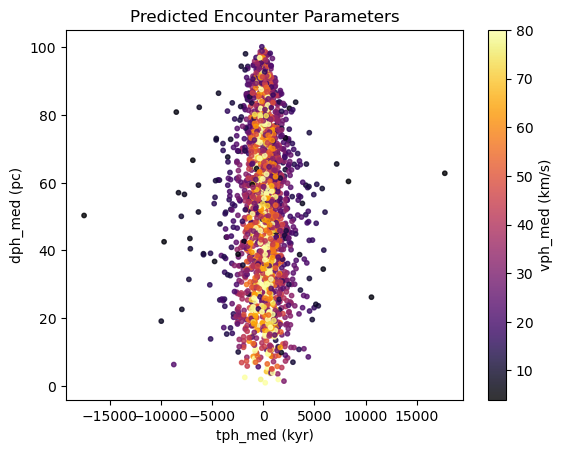

In [142]:
plt.title('Predicted Encounter Parameters')
plt.scatter(enc_params.tph_med, enc_params.dph_med, c=enc_params.vph_med, alpha=0.8, s=10, cmap='inferno', vmin=4, vmax=80)
plt.colorbar(label='vph_med (km/s)')
plt.xlabel('tph_med (kyr)')
plt.ylabel('dph_med (pc)')
plt.show()
